#**Lab 11: Simple MLP**
**Submitted By**: Hira Sardar


#**Task 1: Implement Logical Gates Using the Perceptron Algorithm**

**Step 1: Define the Dataset**

In [ ]:
# Define datasets for each gate
def get_gate_data(gate_type):
    if gate_type == "AND":
        X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
        y = np.array([0, 0, 0, 1])  # Outputs
    elif gate_type == "OR":
        X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
        y = np.array([0, 1, 1, 1])  # Outputs
    elif gate_type == "NOT":
        X = np.array([[0], [1]])  # Single input for NOT
        y = np.array([1, 0])  # Outputs
    else:
        raise ValueError("Invalid gate type!")
    return X, y

**Step 2: Design the simple Perceptron Model**

In [ ]:
import numpy as np

# Perceptron class
class SimplePerceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=50):
        self.weights = np.random.randn(input_size)  # Initialize weights randomly
        self.bias = np.random.randn()  # Initialize bias randomly
        self.learning_rate = learning_rate
        self.epochs = epochs

    # Step activation function
    def step_ftn(self, z):
        return 1 if z > 0 else 0

    # Forward pass to calculate output
    def forward(self, x):
        z = np.dot(self.weights, x) + self.bias
        return self.step_ftn(z)

    # Backward pass to update weights and bias
    def backward(self, x, target, y_pred):
        error = target - y_pred
        # Update weights and bias using the learning rate and error
        self.weights += self.learning_rate * error * x
        self.bias += self.learning_rate * error

    # Train function to iterate over the dataset and apply the forward & backward passes
    def train(self, X, y, epochs=None):
        if epochs is None:
            epochs = self.epochs  # Default to self.epochs if not provided

        for epoch in range(epochs):
            error_count = 0  # Track misclassifications
            for x, target in zip(X, y):
                y_pred = self.forward(x)  # Forward pass to get prediction
                error = target - y_pred  # Calculate error

                if error != 0:
                    self.backward(x, target, y_pred)  # Call the backward function to update weights and bias
                    error_count += 1

            # Print weights, bias, and errors after each epoch
            print(f"Epoch {epoch + 1}: Weights={self.weights}, Bias={self.bias}, Errors={error_count}")

            # Stop early if all inputs are classified correctly
            if error_count == 0:
                print("Training completed successfully!")
                break

    def test(self, X, y):
      correct_predictions = 0  # Initialize counter for correct predictions
      total_predictions = len(y)  # Total number of samples

      for inputs, target in zip(X, y):
          output = self.forward(inputs)  # Get prediction
          print(f"Input: {inputs}, Target: {target}, Predicted Output: {output}")

          if output == target:
              correct_predictions += 1  # Increment if prediction is correct

      accuracy = (correct_predictions / total_predictions) * 100  # Calculate accuracy
      print(f"Accuracy: {accuracy:.2f}%")
      return accuracy


**Step 3 and 4: Train and testthe Perceptron for Each Gate**

In [ ]:
# Train and test the perceptron for each gate
for gate in ["AND", "OR", "NOT"]:
    print(f"\nTraining perceptron for {gate} gate...")
    X, y = get_gate_data(gate)
    input_size = X.shape[1]  # Number of features (inputs)
    perceptron = SimplePerceptron(input_size=input_size, learning_rate=0.01, epochs=200)
    perceptron.train(X, y)  # Train the perceptron

    # Test perceptron after training and calculate accuracy
    print(f"\nTesting {gate} gate:")
    accuracy = perceptron.test(X, y)  # Test and calculate accuracy
    print(f"Accuracy for {gate} gate: {accuracy:.2f}%")


Training perceptron for AND gate...
Epoch 1: Weights=[-1.67030827  0.15309245], Bias=0.43788582999752534, Errors=3
Epoch 2: Weights=[-1.66030827  0.15309245], Bias=0.42788582999752534, Errors=3
Epoch 3: Weights=[-1.65030827  0.15309245], Bias=0.4178858299975253, Errors=3
Epoch 4: Weights=[-1.64030827  0.15309245], Bias=0.4078858299975253, Errors=3
Epoch 5: Weights=[-1.63030827  0.15309245], Bias=0.3978858299975253, Errors=3
Epoch 6: Weights=[-1.62030827  0.15309245], Bias=0.3878858299975253, Errors=3
Epoch 7: Weights=[-1.61030827  0.15309245], Bias=0.3778858299975253, Errors=3
Epoch 8: Weights=[-1.60030827  0.15309245], Bias=0.3678858299975253, Errors=3
Epoch 9: Weights=[-1.59030827  0.15309245], Bias=0.3578858299975253, Errors=3
Epoch 10: Weights=[-1.58030827  0.15309245], Bias=0.34788582999752526, Errors=3
Epoch 11: Weights=[-1.57030827  0.15309245], Bias=0.33788582999752526, Errors=3
Epoch 12: Weights=[-1.56030827  0.15309245], Bias=0.32788582999752525, Errors=3
Epoch 13: Weights=[

**Step 5: Analysis of results**

**How are the accuracies of each gate’s prediction?**

All 3 gates achieved a 100% accuracy.

*Why 100% Accuracy?*

1.  The gates (AND, OR, NOT) are relatively simple tasks that can be learned by the perceptron with a small number of training epochs.
2.  The perceptron can correctly separate the output classes based on the linear nature of these gates (especially for AND and OR).
3.  The training stops as soon as the perceptron makes no errors (i.e., all inputs are classified correctly), and this happens quite quickly for these gates.

**Can simple perception implement complex gates like XOR, comment?**

A **simple perceptron** (with a single layer of output nodes and no hidden layers) **cannot implement complex gates like XOR**.

1. **XOR Gate Behavior**:
   The XOR gate has the following truth table:
   ```
   Input 1 | Input 2 | Output
   ---------------------------
      0     |    0    |    0
      0     |    1    |    1
      1     |    0    |    1
      1     |    1    |    0
   ```
   The key observation is that the XOR gate is **not linearly separable**. This means that there is no straight line (or hyperplane in higher dimensions) that can separate the inputs that produce output `1` from the inputs that produce output `0`.

2. **Linear Separability**:
   - A perceptron works by computing a weighted sum of inputs and applying a threshold function (step function), which produces a linear decision boundary.
   - For simple gates like **AND** and **OR**, you can find a linear boundary that separates the two classes (outputs `0` and `1`).
   - For XOR, the points where the output is `1` (i.e., (0,1) and (1,0)) cannot be separated from the points where the output is `0` (i.e., (0,0) and (1,1)) by a single line. Hence, a single perceptron cannot learn the XOR function.

3. **Solution for XOR**:
   - The XOR gate **requires a more complex model**, typically a **multi-layer perceptron (MLP)** with at least one hidden layer. A multi-layer perceptron can combine multiple simple perceptrons to learn non-linear decision boundaries and thus implement complex logic like XOR.
   - The use of a **non-linear activation function** (like ReLU or sigmoid) in the hidden layer allows the model to learn non-linear relationships between the inputs and outputs, which enables it to correctly classify XOR.

### In Summary:
- **Simple perceptron**: Can only handle linearly separable problems (like AND, OR, NOT).
- **XOR problem**: Requires a **multi-layer perceptron** with hidden layers for non-linear separability.



#**Task.02:MNIST Dataset**

**Step 1: Load and preprocess the dataset**

As the lab requires not using any library, I am downloading the dataset and dropping files in colab.

In [ ]:
!pip install idx2numpy

  Preparing metadata (setup.py) ... done
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7904 sha256=9e08855b458f30c6678f5504e92daed7fc6dbcc648d16aad4f27219d35c61714
  Stored in directory: /root/.cache/pip/wheels/e0/f4/e7/643fc5f932ec2ff92997f43f007660feb23f948aa8486f1107
Successfully built idx2numpy


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import idx2numpy  # To load idx files
def load_data():
    # Load image and label data from the idx files
    X_train = idx2numpy.convert_from_file('/content/train-images.idx3-ubyte')  # Shape: (60000, 28, 28)
    y_train = idx2numpy.convert_from_file('/content/train-labels.idx1-ubyte')  # Shape: (60000,)
    X_test = idx2numpy.convert_from_file('/content/t10k-images.idx3-ubyte')  # Shape: (10000, 28, 28)
    y_test = idx2numpy.convert_from_file('/content/t10k-labels.idx1-ubyte')  # Shape: (10000,)

    return X_train, y_train, X_test, y_test



In [ ]:
# Normalize the data (scale pixel values to [0, 1])
def preprocess_data(X_train, X_test):
    X_train_normalized = X_train.astype('float32') / 255.0
    X_test_normalized = X_test.astype('float32') / 255.0
    return X_train_normalized, X_test_normalized

In [ ]:
# Reshape the data to flatten the images (28x28 to 784)
def reshape_data(X_train, X_test):
    X_train_flattened = X_train.reshape(X_train.shape[0], -1)  # Flattening images
    X_test_flattened = X_test.reshape(X_test.shape[0], -1)  # Flattening images
    return X_train_flattened, X_test_flattened

In [ ]:
# Split the dataset into training and test sets (if needed)
def split_data(X, y, test_size=0.2):
    return train_test_split(X, y, test_size=test_size, random_state=42)

# Load and preprocess the dataset
X_train, y_train, X_test, y_test = load_data()
X_train_normalized, X_test_normalized = preprocess_data(X_train, X_test)
X_train_flattened, X_test_flattened = reshape_data(X_train_normalized, X_test_normalized)


X_train_split, X_val_split, y_train_split, y_val_split = split_data(X_train_flattened, y_train)

# Print shapes of the datasets to verify.
print(f"Training data shape: {X_train_split.shape}, Training labels shape: {y_train_split.shape}")
print(f"Validation data shape: {X_val_split.shape}, Validation labels shape: {y_val_split.shape}")
print(f"Test data shape: {X_test_flattened.shape}, Test labels shape: {y_test.shape}")


Training data shape: (48000, 784), Training labels shape: (48000,)
Validation data shape: (12000, 784), Validation labels shape: (12000,)
Test data shape: (10000, 784), Test labels shape: (10000,)


**Step 2: Visualize the dataset**

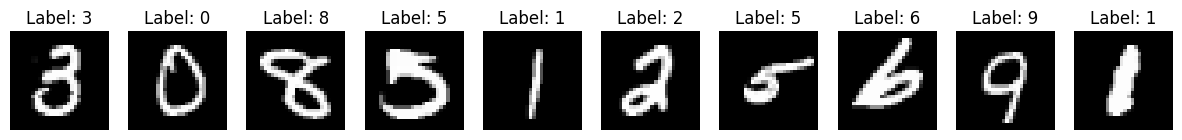

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Visualize some random images from the dataset
def visualize_random_images(X_train, y_train, num_images=5):
    # Generate random indices
    random_indices = np.random.choice(len(X_train), num_images, replace=False)

    # Create subplots to display images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    for i, ax in enumerate(axes):
        # Get the image data and corresponding label
        image = X_train[random_indices[i]]
        label = y_train[random_indices[i]]

        # Display the image
        ax.imshow(image, cmap='gray')
        ax.set_title(f"Label: {label}")
        ax.axis('off')  # Hide axis

    plt.show()

# Visualize 10 random images from the training set
visualize_random_images(X_train, y_train, num_images=10)


**Step 3: Implement the Simple Perceptron model**

In [ ]:
import numpy as np

class SimplePerceptronSoftmax:
    def __init__(self, input_size, num_classes, learning_rate=0.001, epochs=50):
        self.weights = np.random.randn(input_size, num_classes)  # Initialize weights for multi-class
        self.bias = np.random.randn(num_classes)  # Bias for each class
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.num_classes = num_classes

    def softmax(self, z):
        """Softmax activation function"""
        exp_values = np.exp(z - np.max(z))  # Subtract max for numerical stability
        return exp_values / np.sum(exp_values, axis=0)

    def forward(self, x):
        """Compute the output of the perceptron (forward propagation with softmax)"""
        z = np.dot(x, self.weights) + self.bias
        return self.softmax(z)

    def compute_loss(self, y, output):
        """Compute cross-entropy loss"""
        return -np.sum(y * np.log(output))

    def backward(self, X, y, output):
        """Update weights and biases using backward propagation"""
        error = output - y
        dw = np.dot(X.T, error)  # Gradient for weights
        db = np.sum(error, axis=0)  # Gradient for bias
        # Update weights and bias using the learning rate
        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db
        return error

    def train(self, X, y):
        """Train the perceptron over multiple epochs"""
        for epoch in range(self.epochs):
            total_loss = 0
            for x, target in zip(X, y):
                output = self.forward(x)
                loss = self.compute_loss(target, output)
                total_loss += loss
                # Backpropagation to update weights and bias
                self.backward(x.reshape(1, -1), target.reshape(1, -1), output)

            print(f"Epoch {epoch + 1}: Total loss = {total_loss}")

            # Early stop if loss is minimal
            if total_loss < 1e-6:
                print("Training complete!")
                break

    def predict(self, X):
        """Predict the class for each input"""
        output = self.forward(X)
        return np.argmax(output, axis=1)  # Return the index of the max probability

**Step 4: Train the Simple Perceptron model**

In [ ]:
# Initialize and train the perceptron model
perceptron = SimplePerceptronSoftmax(input_size=X_train_flattened.shape[1], num_classes=10, learning_rate=0.01, epochs=100)
perceptron.train(X_train_split, y_train_split)

Epoch 1: Total loss = 8559093.636305084
Epoch 2: Total loss = 5919691.962554076
Epoch 3: Total loss = 5448691.646939118
Epoch 4: Total loss = 5252647.088505608
Epoch 5: Total loss = 5151631.714526476
Epoch 6: Total loss = 5092633.441465101
Epoch 7: Total loss = 5055063.778796093
Epoch 8: Total loss = 5029550.150463552
Epoch 9: Total loss = 5011331.2505714595
Epoch 10: Total loss = 4997785.206428603
Epoch 11: Total loss = 4987375.365411837
Epoch 12: Total loss = 4979154.394374985
Epoch 13: Total loss = 4972512.859588726
Epoch 14: Total loss = 4967044.032675868
Epoch 15: Total loss = 4962467.6185352765
Epoch 16: Total loss = 4958584.933543969
Epoch 17: Total loss = 4955251.60579687
Epoch 18: Total loss = 4952360.40619967
Epoch 19: Total loss = 4949830.133796089
Epoch 20: Total loss = 4947598.229350279
Epoch 21: Total loss = 4945615.748694155
Epoch 22: Total loss = 4943843.867707368
Epoch 23: Total loss = 4942251.404581899
Epoch 24: Total loss = 4940813.032073483
Epoch 25: Total loss = 49

**Step 5: Evaluate the performance of the Simple Perceptron model on the test set**

In [ ]:
# Test the perceptron after training
print("\nTesting the perceptron:")
predictions = perceptron.predict(X_test_flattened)

# Calculate accuracy
accuracy = np.mean(y_test == predictions) * 100
print(f"Test Accuracy: {accuracy:.2f}%")


Testing the perceptron:
Test Accuracy: 9.80%


**Step 6: Analysis on the results**

An accuracy of **9.80%** for the test set is **not satisfactory**, especially when using the MNIST dataset. MNIST is a relatively simple dataset, and modern models should be able to achieve much higher accuracy (typically above 90% for simple models, and even higher with more advanced models like Convolutional Neural Networks). Here are a few ideas on how to improve the accuracy:

### 1. **Model Improvements**:
   - **Increase Model Complexity**:
     The Simple Perceptron model used here is quite basic, and it's not well-suited for solving complex problems like MNIST, which requires a model capable of capturing spatial hierarchies in the data (like how numbers are written).
     
     - **Use Multi-Layer Perceptron (MLP)**: A simple perceptron with a single output layer is not sufficient for a complex dataset. Adding hidden layers (forming a Multi-Layer Perceptron) can help the model learn more complex representations.
     
     - **Try Convolutional Neural Networks (CNNs)**: CNNs are the go-to architecture for image classification tasks. They are specifically designed to work well with grid-like data such as images. Even a small CNN model will likely outperform a perceptron.

### 2. **Hyperparameter Tuning**:
   - **Learning Rate**: The learning rate might be too small. A learning rate that is too small can lead to very slow training and convergence, while one that is too large can cause overshooting of the optimal weights. It might help to experiment with larger learning rates like `0.1`.
   
   - **Number of Epochs**: The model might not be trained for enough epochs. 

### 3. **Regularization**:
   - **L2 Regularization**: Adding regularization (like L2 regularization) can help prevent overfitting and improve generalization. This will reduce the impact of large weights and encourage the model to learn simpler, more robust features.

### 4. **Data Augmentation**:
   - The MNIST dataset has a fixed set of training images. We can apply **data augmentation** techniques such as rotation, scaling, shifting, and flipping to artificially expand the dataset and help the model generalize better. This is especially useful when the model is struggling to generalize well on unseen data.

### 5. **Weight Initialization**:
   - **Better Weight Initialization**: The perceptron uses random weight initialization which can sometimes lead to poor convergence. Using more advanced weight initialization techniques (like Xavier or He initialization) can help the network converge faster and more effectively.

### 6. **Optimizer**:
   - **Switch Optimizer**: The perceptron is using basic gradient descent, which might be slow and inefficient. We can switch to more advanced optimizers like **SGD with momentum** or **Adam**, which can lead to faster convergence and better performance.

### 7. **Batching**:
   - **Mini-batch Gradient Descent**: Instead of updating weights for each individual training sample (stochastic gradient descent), you can use mini-batches of data for each weight update. This tends to result in more stable updates and can speed up training.

### 8. **Data Preprocessing**:
   - **Better Normalization**: Although the pixel values have been normalized to a range of [0, 1], consider also applying **zero-centering** (subtracting the mean pixel value from each pixel) to help the model learn better.

### 9. **Model Evaluation**:
   - **Cross-Validation**: Instead of relying on a single split between training and testing data, using **cross-validation** can help ensure that the model is generalizing well across all subsets of the data.

---

### Summary:
While the current Simple Perceptron model is not performing well (with only ~9.80% accuracy), switching to a more sophisticated model (like an MLP or CNN), tuning hyperparameters, adding regularization, or using advanced optimizers could significantly improve accuracy. Starting with these suggestions and iterating on the model will likely lead to a much better result on the MNIST dataset.